In [1]:
!pip install tensorflow==2.11.0
!pip install tensorflow-addons==0.19.0
import tensorflow_addons as tfa

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
import random
import numpy as np
import tqdm
import cv2
import os
from keras import layers
import gc
from tensorflow.keras.regularizers import l2
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

black grass sample size :  263 

Charlock sample size :  390 

Cleavers sample size :  287 

Common Chickweed sample size :  611 

Common wheat sample size :  221 

Scentless Mayweed sample size :  516 

Fat Hen sample size :  475 

Loose Silky sample size :  672 

Maize sample size :  225 

Shepherds Purse sample size :  231 

Small flowered Cranesbill sample size :  502 

Sugar_beet sample size :  385 



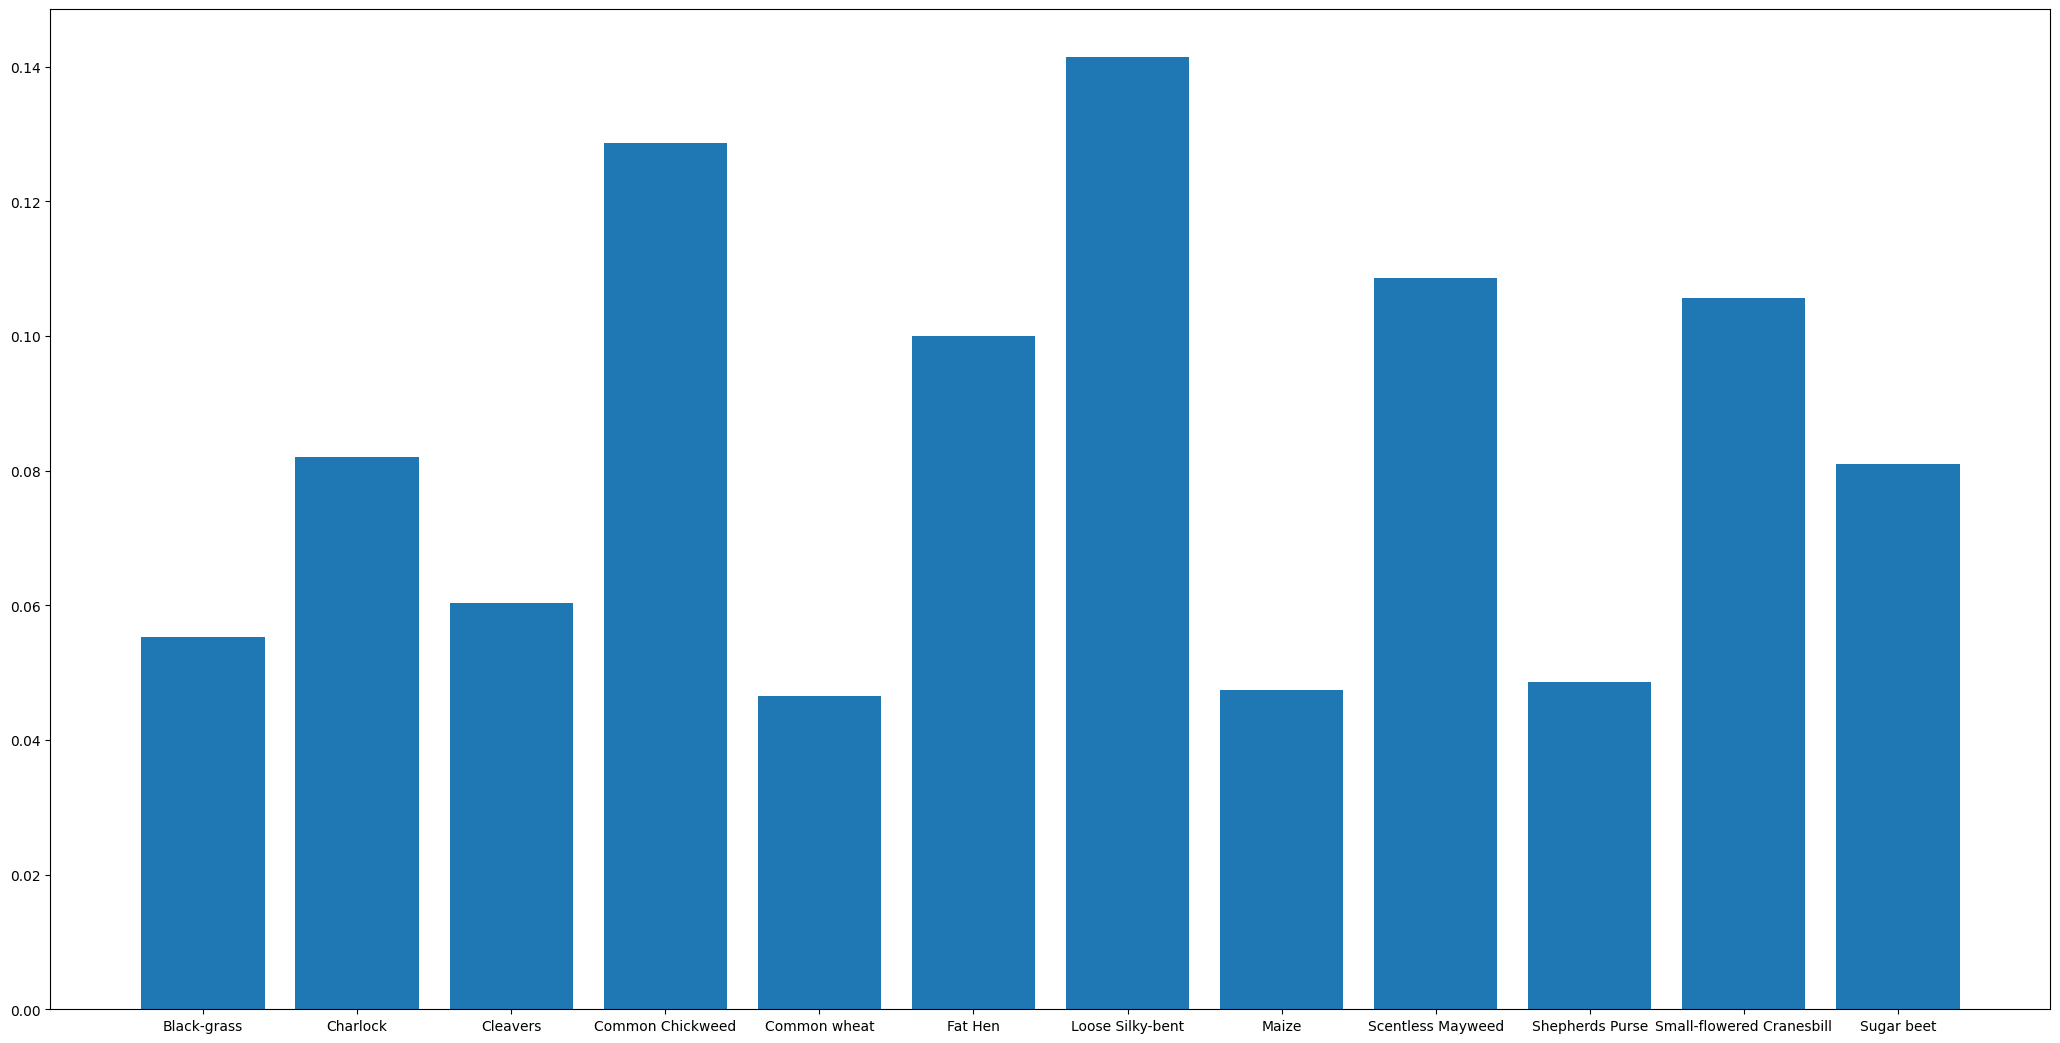

In [3]:
training_images_files_names_black_grass = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Black-grass"))
training_images_files_names_Charlock = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Charlock"))
training_images_files_names_Cleavers = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Cleavers"))
training_images_files_names_Common_Chickweed = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Common Chickweed"))
training_images_files_names_Common_wheat = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Common wheat"))
training_images_files_names_Scentless_Mayweed = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Scentless Mayweed"))
training_images_files_names_Fat_Hen = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Fat Hen"))
training_images_files_names_Loose_Silky_bent = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Loose Silky-bent"))
training_images_files_names_Maize = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Maize"))
training_images_files_names_Shepherds_Purse = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Shepherds Purse"))
training_images_files_names_Small_flowered_Cranesbill = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Small-flowered Cranesbill"))
training_images_files_names_Sugar_beet = len(os.listdir("/content/drive/MyDrive/IVA PROJECT/train/Sugar beet"))
print("black grass sample size : ",training_images_files_names_black_grass,"\n")
print("Charlock sample size : ",training_images_files_names_Charlock,"\n")
print("Cleavers sample size : ",training_images_files_names_Cleavers,"\n")
print("Common Chickweed sample size : ",training_images_files_names_Common_Chickweed,"\n")
print("Common wheat sample size : ",training_images_files_names_Common_wheat,"\n")
print("Scentless Mayweed sample size : ",training_images_files_names_Scentless_Mayweed,"\n")
print("Fat Hen sample size : ",training_images_files_names_Fat_Hen,"\n")
print("Loose Silky sample size : ",training_images_files_names_Loose_Silky_bent,"\n")
print("Maize sample size : ",training_images_files_names_Maize,"\n")
print("Shepherds Purse sample size : ",training_images_files_names_Shepherds_Purse,"\n")
print("Small flowered Cranesbill sample size : ",training_images_files_names_Small_flowered_Cranesbill,"\n")
print("Sugar_beet sample size : ",training_images_files_names_Sugar_beet,"\n")
occurences = [training_images_files_names_black_grass/4750,training_images_files_names_Charlock/4750,training_images_files_names_Cleavers/4750,training_images_files_names_Common_Chickweed/4750,training_images_files_names_Common_wheat/4750,training_images_files_names_Fat_Hen/4750,training_images_files_names_Loose_Silky_bent/4750,training_images_files_names_Maize/4750,training_images_files_names_Scentless_Mayweed/4750,training_images_files_names_Shepherds_Purse/4750,training_images_files_names_Small_flowered_Cranesbill/4750,training_images_files_names_Sugar_beet/4750]
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","Shepherds Purse","Small-flowered Cranesbill","Sugar beet"],occurences)
plt.show()

In [4]:
plant_species = os.listdir("/content/drive/MyDrive/IVA PROJECT/train")
for plant_specie in plant_species:
   images_file_name = os.listdir("/content/drive/MyDrive/IVA PROJECT/train/"+plant_specie)
   sample_size_to_display = random.sample(range(0,100), 3)
   if plant_specie == ".ipynb_checkpoints":
     continue
   print("plant species :",plant_specie)
   for i in range(0,3):
     img = cv2.imread("/content/drive/MyDrive/IVA PROJECT/train/"+plant_specie+"/"+images_file_name[sample_size_to_display[i]], cv2.IMREAD_COLOR)
     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
     plt.imshow(img)
     plt.show()
     #cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
def vizualize_random_images(original_tensor,transformed_tensor,sample_size_to_display):
     sample_size_to_display = random.sample(range(0,original_tensor.shape[0]), sample_size_to_display)
     for i in range(0,len(sample_size_to_display)):
         img = original_tensor[sample_size_to_display[i]]
         mask = transformed_tensor[sample_size_to_display[i]]
         figure_size = 10
         print('Original image :')
         plt.figure(figsize=(figure_size,figure_size))
         plt.subplot(1,2,1)
         plt.imshow(img)
         plt.show()
         print('Transformed image :')
         plt.figure(figsize=(figure_size,figure_size))
         plt.subplot(1,2,1)
         plt.imshow(mask)
         plt.show()

In [6]:
label_encoding_mapper = {"Black-grass" : 0,"Charlock" : 1,"Cleavers": 2,"Common Chickweed" : 3,"Common wheat" : 4,"Fat Hen" : 5,"Loose Silky-bent" : 6,"Maize" : 7,"Scentless Mayweed" : 8,"Shepherds Purse" : 9,"Small-flowered Cranesbill" : 10,"Sugar beet" : 11}
training_size = training_images_files_names_black_grass + training_images_files_names_Charlock + training_images_files_names_Cleavers + training_images_files_names_Common_Chickweed + training_images_files_names_Common_wheat + training_images_files_names_Fat_Hen + training_images_files_names_Loose_Silky_bent + training_images_files_names_Maize + training_images_files_names_Scentless_Mayweed + training_images_files_names_Shepherds_Purse + training_images_files_names_Small_flowered_Cranesbill + training_images_files_names_Sugar_beet
y_train =  np.array([[0 for i in range(0,12)] for k in range(0,training_size)])
plant_species = os.listdir("/content/drive/MyDrive/IVA PROJECT/train")
x_train = []
index = 0
for plant_specie in plant_species:
   images_file_name = os.listdir("/content/drive/MyDrive/IVA PROJECT/train/"+plant_specie)
   for i in range(0,len(images_file_name)):
     img_path = os.path.join("/content/drive/MyDrive/IVA PROJECT/train", plant_specie, images_file_name[i])
     img = cv2.imread(img_path, cv2.IMREAD_COLOR)
     if img is None:
         print(f"Error loading image: {img_path}")
         continue
     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
     if img.shape != (100,100,3):
         resized = cv2.resize(img,(100,100), interpolation = cv2.INTER_AREA)
     x_train = x_train + [resized]
     y_train[index][label_encoding_mapper[plant_specie]] = 1
     index = index + 1
x_train = np.array(x_train)
y_train = np.array(y_train)

In [7]:
url = "/content/drive/MyDrive/IVA PROJECT/sample_submission (1).csv"
submission_file = pd.read_csv(url)
test_images_file_names = list(submission_file["file"])

In [8]:
x_test = []

for i in range(0,len(test_images_file_names)):
    img = cv2.imread("/content/drive/MyDrive/IVA PROJECT/test/"+test_images_file_names[i], cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if img.shape != (100,100,3):
        resized = cv2.resize(img,(100,100), interpolation = cv2.INTER_AREA)
    x_test = x_test + [resized]
x_test = np.array(x_test)

In [9]:
print("training sample : ",x_train.shape,"  ",y_train.shape,"\n")
print("test sample : ",x_test.shape,"\n")

training sample :  (4778, 100, 100, 3)    (4778, 12) 

test sample :  (794, 100, 100, 3) 



In [10]:
plant_species= ["Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","Shepherds Purse","Small-flowered Cranesbill","Sugar beet"]
index_storage = {"Black-grass" : [],"Charlock" : [],"Cleavers": [],"Common Chickweed" : [],"Common wheat" : [],"Fat Hen" : [],"Loose Silky-bent" : [],"Maize" : [],"Scentless Mayweed" : [],"Shepherds Purse" : [],"Small-flowered Cranesbill" : [],"Sugar beet" : []}
for i in range(0,len(x_train)):
    index = y_train[i].tolist().index(1)
    index_storage[plant_species[index]] = index_storage[plant_species[index]] + [i]

In [11]:
data_augmentation1 = tf.keras.Sequential([layers.RandomFlip("horizontal_and_vertical"),layers.RandomRotation(0.2)])
augmented_dataset1 = data_augmentation1(x_train)
gc.collect()
data_augmentation2 = tf.keras.Sequential([layers.RandomTranslation(height_factor=(-0.1,0.1),width_factor=(-0.1,0.1),interpolation="nearest")])
augmented_dataset2 = data_augmentation2(x_train)
gc.collect()
data_augmentation3 = tf.keras.Sequential([layers.RandomFlip("horizontal_and_vertical"),layers.RandomRotation(0.3)])
augmented_dataset3 = data_augmentation3(x_train)
gc.collect()

9365

In [12]:
def augment_data(x_train,y_train,Specie,training_size,Specie_total_size):

  j = training_size
  one_hot_encoded_array_for_species = [0 for i in range(0,12)]
  for i in range(0,12):
      if label_encoding_mapper[Specie] == i:
           one_hot_encoded_array_for_species[i] = 1

  while j <= Specie_total_size:
     if j + training_size > Specie_total_size:
        b = training_size - (j + training_size - Specie_total_size)
        dummy_variable = random.randint(1,3)
        if dummy_variable == 1:
           augmented_dataset = data_augmentation1(x_train[index_storage[Specie]])
           gc.collect()
        if dummy_variable == 2:
           augmented_dataset = data_augmentation2(x_train[index_storage[Specie]])
           gc.collect()
        if dummy_variable == 3:
           augmented_dataset = data_augmentation3(x_train[index_storage[Specie]])
           gc.collect()
        x_train = np.concatenate([x_train,augmented_dataset[:b]])
        for i in range(0,b):
          y_train = y_train + [one_hot_encoded_array_for_species]
     else:
        dummy_variable = random.randint(1,3)
        if dummy_variable == 1:
           augmented_dataset = data_augmentation1(x_train[index_storage[Specie]])
           gc.collect()
        if dummy_variable == 2:
           augmented_dataset = data_augmentation2(x_train[index_storage[Specie]])
           gc.collect()
        if dummy_variable == 3:
           augmented_dataset = data_augmentation3(x_train[index_storage[Specie]])
           gc.collect()
        x_train = np.concatenate([x_train,augmented_dataset])
        for i in range(0,training_size):
          y_train = y_train + [one_hot_encoded_array_for_species]
     j = j + training_size
     gc.collect()

  print(x_train.shape)

In [13]:
augment_data(x_train,y_train,"Black-grass",len(index_storage["Black-grass"]),1000)


(5515, 100, 100, 3)


**IMAGE PROCESSING**

1. IMAGE BLURRING


Original image :


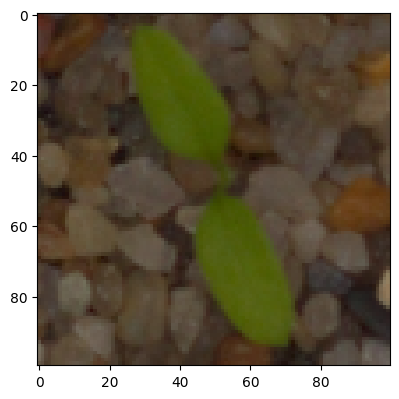

Transformed image :


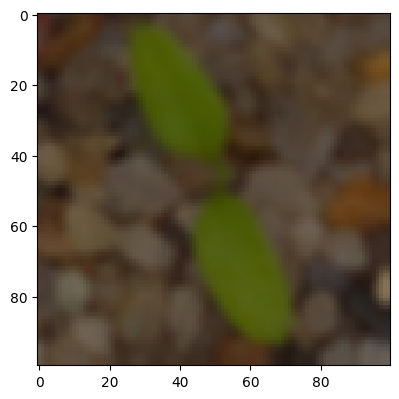

Original image :


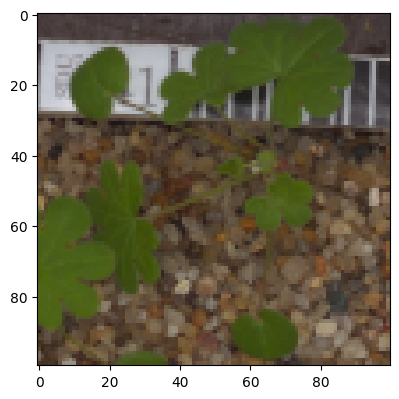

Transformed image :


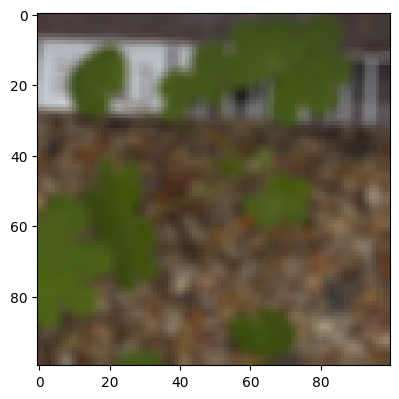

In [14]:
x_train_blurred = tfa.image.gaussian_filter2d(x_train,filter_shape=(4,4),sigma=100)
x_test_blurred = tfa.image.gaussian_filter2d(x_test,filter_shape=(4,4),sigma=100)
vizualize_random_images(x_train,x_train_blurred,2)

In [15]:
def segment_image(img):
  img2 = cv2.cvtColor(np.float32(img),cv2.COLOR_RGB2HSV)
  green_segment_values = 50
  hsv_lower_bound = np.array([100-green_segment_values,0,0])
  hsv_upper_bound = np.array([100+green_segment_values,255,240])
  mask = cv2.inRange(img2,hsv_lower_bound,hsv_upper_bound)
  kernel = np.ones((3,3),np.uint8)
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
  return mask


In [16]:
def preprocess_dataset(x_train):
  preprocessed_data = []
  for i in range(0,x_train.shape[0]):
    preprocessed_data = preprocessed_data + [segment_image(x_train[i])]
  return preprocessed_data

Original image :


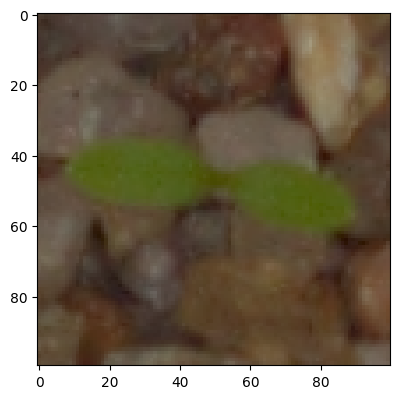

Transformed image :


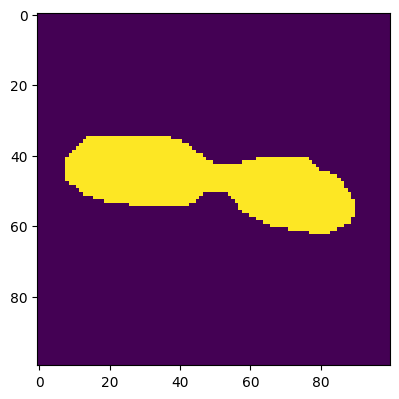

Original image :


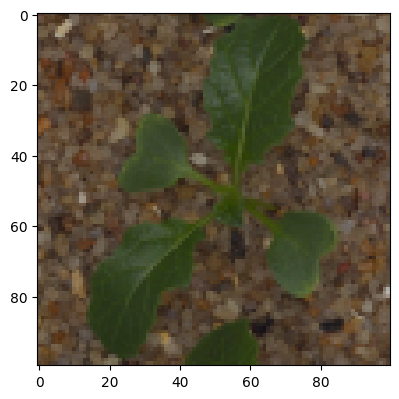

Transformed image :


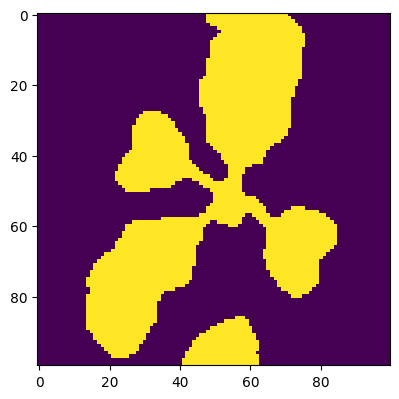

In [17]:
preprocessed_data = np.array(preprocess_dataset(x_train_blurred))
preprocessed_test_data = np.array(preprocess_dataset(x_test_blurred))
vizualize_random_images(x_train,preprocessed_data,2)

In [18]:
(x_training, valX, y_training, valY) = train_test_split(x_train,y_train,test_size=0.15, random_state=10)

In [19]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,horizontal_flip=True,vertical_flip=True,rescale=1/255)
datagen.fit(x_training)
it = datagen.flow(x_training,y_training,batch_size=32)
datagenval = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
datagenval.fit(valX)
itval = datagenval.flow(valX, valY)
datagentest = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
datagentest.fit(x_test)
ittest = datagentest.flow(x_test)

In [20]:
(x_training_processed, valX_processed, y_training_processed, valY_processed) = train_test_split(preprocessed_data,y_train,test_size=0.15, random_state=10)

In [22]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,horizontal_flip=True,vertical_flip=True,rescale=1/255)
num_samples = x_training_processed.shape[0]
x_training_processed = tf.reshape(x_training_processed,shape=(num_samples, 100, 100,1))
datagen.fit(x_training_processed)
training_processed_data_flow = datagen.flow(x_training_processed,y_training_processed)
datagenval = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

num_val_samples = valX_processed.shape[0]
valX_processed = tf.reshape(valX_processed,shape=(num_val_samples, 100, 100,1))

datagenval.fit(valX_processed)
validation_processed_data_flow = datagenval.flow(valX_processed,valY_processed)
datagentest = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

num_test_samples = preprocessed_test_data.shape[0]
preprocessed_test_data = tf.reshape(preprocessed_test_data,shape=(num_test_samples, 100, 100,1))

datagentest.fit(preprocessed_test_data)
test_processed_data_flow = datagentest.flow(preprocessed_test_data)

In [23]:
INIT_LR = 1e-2
BATCH_SIZE = 32
EPOCHS = 150

s = tf.keras.backend.clear_session()

opt = tf.keras.optimizers.Adam(learning_rate=INIT_LR)
tqdm_callback = tfa.callbacks.TQDMProgressBar()
def lr_scheduler(epoch):
   return (INIT_LR * 1.1)
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", tf.keras.backend.get_value(model.optimizer.lr))
class GarbageCollectorCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

**MODELLING**

1. SVM

In [24]:
y_train_ordinal = np.argmax(y_training_processed, axis=1)
x_training_processed_flattened = tf.keras.layers.Flatten()(x_training_processed)
svc = svm.SVC(decision_function_shape='ovo',kernel='rbf',C=10000)
svc.fit(x_training_processed_flattened,y_train_ordinal)
valX_processed_flattened = tf.keras.layers.Flatten()(valX_processed)
y_pred_test_classes = svc.predict(valX_processed_flattened)
y_test_ordinal = np.argmax(valY_processed, axis=1)
print("F1 score for svm model :",f1_score(y_test_ordinal, y_pred_test_classes,average='micro'))

F1 score for svm model : 0.6387726638772664


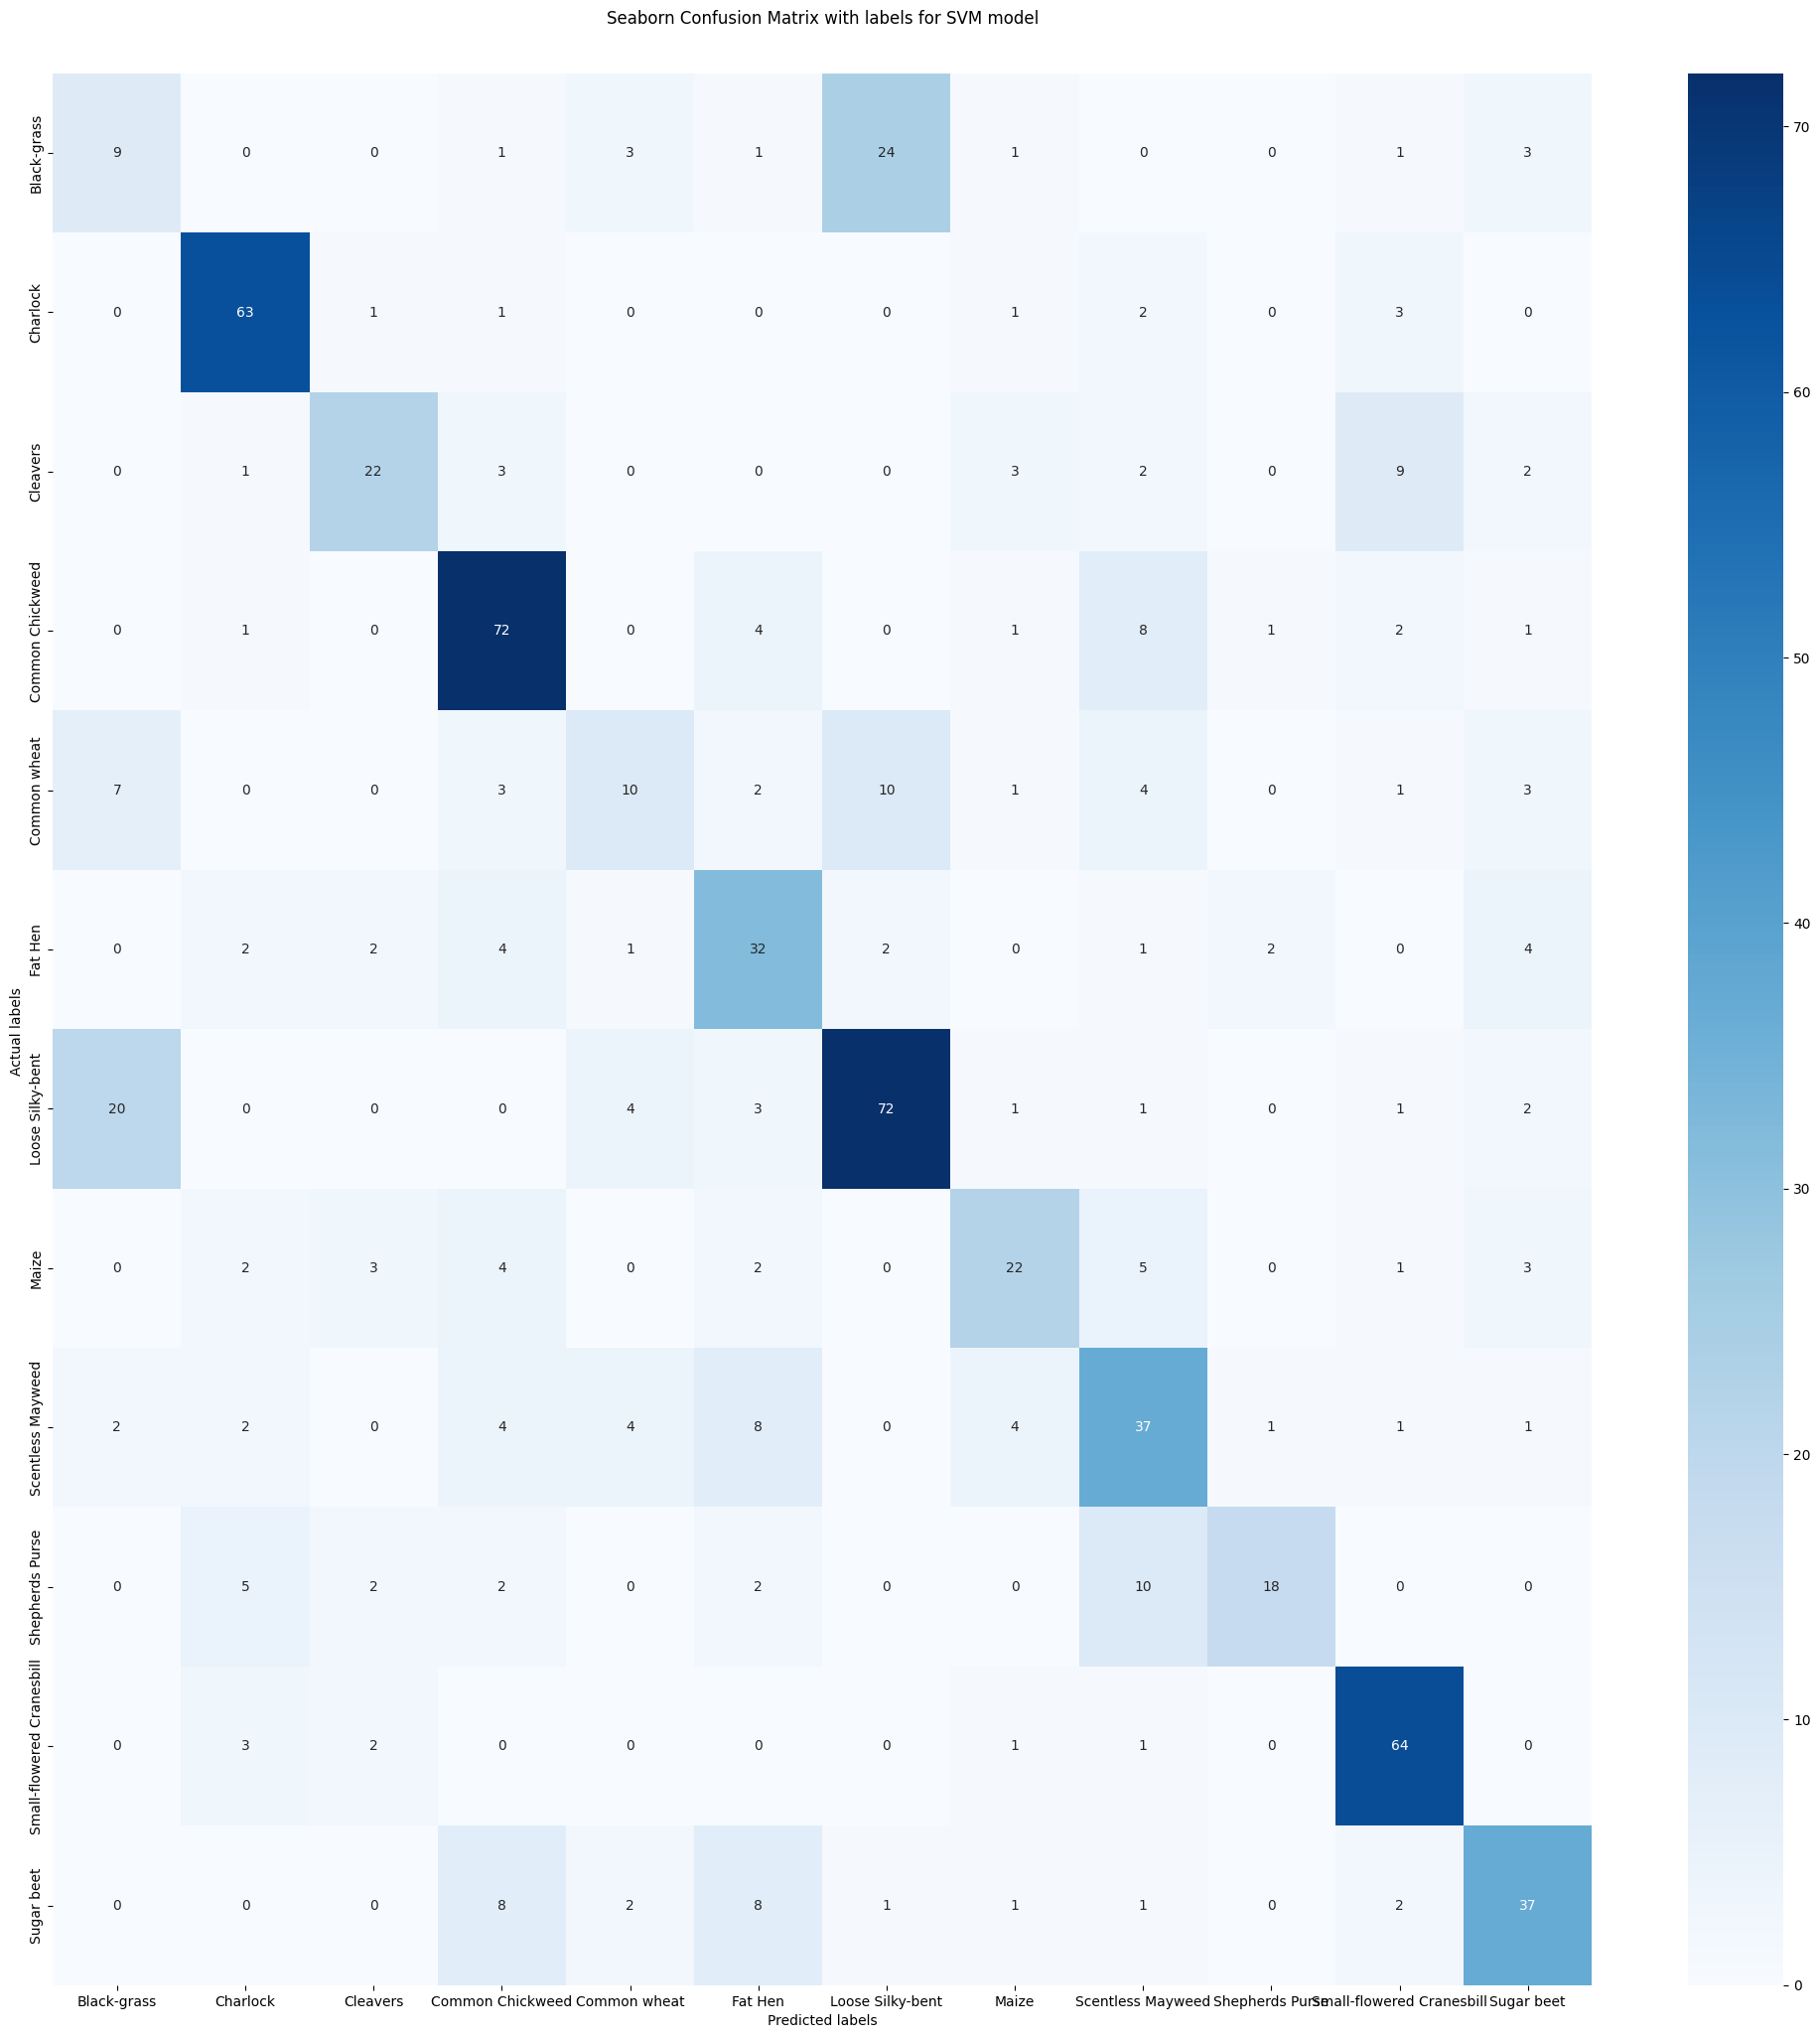

In [25]:
cf_matrix = confusion_matrix(y_test_ordinal, y_pred_test_classes)


plt.figure(figsize=(25, 25))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')


ax.set_title('Seaborn Confusion Matrix with labels for SVM model\n\n');
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels ')

ax.xaxis.set_ticklabels(["Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","Shepherds Purse","Small-flowered Cranesbill","Sugar beet"])
ax.yaxis.set_ticklabels(["Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","Shepherds Purse","Small-flowered Cranesbill","Sugar beet"])

plt.show()

2. *RESNET16*

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 fc1 (Dense)                 (None, 256)               8388864   
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 fc2 (Dense)                 (None, 256)               65792     
                                                        

Training:   0%|           0/3 ETA: ?s,  ?epochs/s

Learning rate: 0.011
Epoch 1/3


0/126           ETA: ?s - 

Learning rate: 0.011
Epoch 2/3


0/126           ETA: ?s - 

Learning rate: 0.011
Epoch 3/3


0/126           ETA: ?s - 

Text(0, 0.5, 'loss')

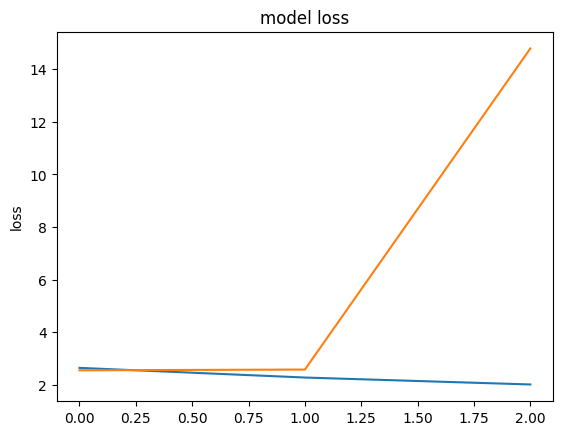

In [38]:
def make_resnet50_based_model():
    model = tf.keras.Sequential()

    base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

    # Unfreeze some layers for fine-tuning
    for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
        layer.trainable = True

    model.add(base_model)
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(256, name='fc1'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.10, noise_shape=None, seed=0))
    model.add(tf.keras.layers.Dense(256, name='fc2'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.10, noise_shape=None, seed=0))
    # FC
    model.add(tf.keras.layers.Dense(12))  # the last layer with neuron for each class
    model.add(tf.keras.layers.Activation("softmax"))  # output probabilities
    return model


s = tf.keras.backend.clear_session()
model = make_resnet50_based_model()
model.summary()
tqdm_callback = tfa.callbacks.TQDMProgressBar()

# Build the optimizer with the model's trainable variables
#Moved the optimizer creation here
opt = tf.keras.optimizers.Adam()

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt, # Pass the optimizer instance to the compile method
    metrics=[tfa.metrics.F1Score(num_classes=12, average="micro")]
)
# The optimizer will be built automatically by the compile method

history = model.fit(
    it,  # prepared data
    epochs=3,
    validation_data=itval,
    steps_per_epoch=len(x_training) // BATCH_SIZE,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler),
               LrHistory(),
               tqdm_callback,
               GarbageCollectorCallback(),
               ],
    shuffle=True,
    verbose=0)

plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.title('model loss')
plt.ylabel('loss')

3. INCEPTION V3

In [39]:
def make_Inception_based_model():

    model = tf.keras.Sequential()

    model.add(tf.keras.applications.InceptionV3(weights='imagenet',include_top=False,input_shape=(100,100,3)))
    model.add(tf.keras.layers.Flatten())


    model.add(tf.keras.layers.Dense(256, name='fc1'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.10, noise_shape=None, seed=0))
    model.add(tf.keras.layers.Dense(256, name='fc2'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.10, noise_shape=None, seed=0))
    # FC
    model.add(tf.keras.layers.Dense(12))  # the last layer with neuron for each class
    model.add(tf.keras.layers.Activation("softmax"))  # output probabilities
    return model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 fc1 (Dense)                 (None, 256)               524544    
                                                                 
 batch_normalization_94 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 fc2 (Dense)                 (None, 256)               65792     
                                                        

Training:   0%|           0/3 ETA: ?s,  ?epochs/s

Learning rate: 0.011
Epoch 1/3


0/126           ETA: ?s - 

Learning rate: 0.011
Epoch 2/3


0/126           ETA: ?s - 

Learning rate: 0.011
Epoch 3/3


0/126           ETA: ?s - 

Text(0, 0.5, 'loss')

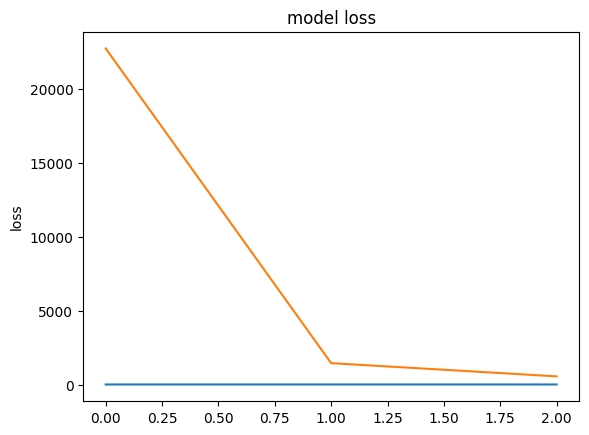

In [42]:
s = tf.keras.backend.clear_session()
model = make_Inception_based_model()
model.summary()
tqdm_callback = tfa.callbacks.TQDMProgressBar()

# Create a new optimizer instance for the new model
opt = tf.keras.optimizers.Adam() # Moved optimizer creation here

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,  # Pass the new optimizer instance
    metrics=[tfa.metrics.F1Score(num_classes=12,average="micro")]
)
history = model.fit(
    it,  # prepared data
    epochs=3,
    validation_data=itval,
    steps_per_epoch=len(x_training) // BATCH_SIZE,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler),
               LrHistory(),
               tqdm_callback,
               GarbageCollectorCallback(),
               ],
    shuffle=True
    ,verbose=0)

plt.plot(history.history['loss'],label="training loss")
plt.plot(history.history['val_loss'],label="validation loss")
plt.title('model loss')
plt.ylabel('loss')

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

val_true = []
for _, labels in itval:  s
    val_true.extend(labels)
val_true = np.array(val_true)

val_true_classes = np.argmax(val_true, axis=1)

val_preds = model.predict(itval)
val_preds_classes = np.argmax(val_preds, axis=1)

f1 = f1_score(val_true_classes, val_preds_classes, average='micro')
print(f"Validation F1 Score: {f1}")